In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/deep learning dataset/archive (10)/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [14]:
x.shape,y.shape

((10000, 10), (10000,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [20]:
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [22]:
sc = StandardScaler()

In [34]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [39]:
history = model.fit(x_train_sc,y_train,batch_size = 50,epochs = 100,verbose = 1,validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5877 - loss: 0.6865 - val_accuracy: 0.7981 - val_loss: 0.5043
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8009 - loss: 0.4921 - val_accuracy: 0.8019 - val_loss: 0.4547
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8023 - loss: 0.4573 - val_accuracy: 0.8056 - val_loss: 0.4318
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.4445 - val_accuracy: 0.8062 - val_loss: 0.4196
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7956 - loss: 0.4350 - val_accuracy: 0.8175 - val_loss: 0.4110
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8143 - loss: 0.4122 - val_accuracy: 0.8281 - val_loss: 0.4026
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8187 - loss: 0.4063 - val_accuracy: 0.8356 - val_loss: 0.3939
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8293 - loss: 0.4030 - val_accu

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3169 - val_accuracy: 0.8494 - val_loss: 0.3449
Epoch 52/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3198 - val_accuracy: 0.8544 - val_loss: 0.3444
Epoch 53/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8632 - loss: 0.3258 - val_accuracy: 0.8531 - val_loss: 0.3451
Epoch 54/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8622 - loss: 0.3290 - val_accuracy: 0.8519 - val_loss: 0.3456
Epoch 55/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8699 - loss: 0.3209 - val_accuracy: 0.8531 - val_loss: 0.3456
Epoch 56/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8691 - loss: 0.3129 - val_accuracy: 0.8550 - val_loss: 0.3454
Epoch 57/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.3118 - val_accuracy: 0.8519 - val_loss: 0.3451
Epoch 58/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8722 - loss: 0.3182 - val_accuracy:

In [42]:
model.layers[0].get_weights()

[array([[-0.03728234, -0.1841535 , -0.7108694 , -0.03420742, -0.48856243,
          0.00145115, -0.14465553, -0.11734685,  0.27914062,  0.1312817 ,
         -0.01995531],
        [ 0.7204375 ,  1.2590507 , -0.2823494 ,  0.5710127 ,  0.00864776,
          0.27482417,  0.05420531,  0.17409393, -0.26339516, -0.537281  ,
          0.19752103],
        [ 0.05221308, -0.01831711,  0.09856863,  0.27011943, -0.00509365,
         -0.30906788,  0.07806055, -0.06635055,  0.08378465, -0.1512634 ,
         -0.13487709],
        [-0.57865214,  0.35982   ,  0.20403533, -0.09067977, -0.49315047,
         -0.3620029 , -0.4177093 , -0.26308402, -0.12375168, -0.20895678,
          0.93055904],
        [-1.0798435 ,  0.5259854 ,  0.53045285,  0.04580173,  0.10420512,
          0.51119405,  0.00391378,  1.1219362 , -0.05872006,  0.6948355 ,
          0.79407954],
        [-0.12048251, -0.23749731, -0.4535849 , -0.39043674,  0.13358341,
          0.03906482, -0.6470126 , -0.03327423, -0.3777153 ,  0.6895577

In [44]:
y_log = model.predict(x_test_sc)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.04173919],
       [0.01141101],
       [0.08381788],
       ...,
       [0.8294207 ],
       [0.07523365],
       [0.26259995]], dtype=float32)

In [46]:
import numpy as np

In [47]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [49]:
accuracy_score(y_test,y_pred)

0.8635

In [50]:
import matplotlib.pyplot as plt

In [55]:
history.history

{'accuracy': [0.7057812213897705,
  0.7953125238418579,
  0.7987499833106995,
  0.797656238079071,
  0.8018749952316284,
  0.8118749856948853,
  0.8253124952316284,
  0.8315625190734863,
  0.8376562595367432,
  0.8435937762260437,
  0.8482812643051147,
  0.8501562476158142,
  0.8534374833106995,
  0.8539062738418579,
  0.8565624952316284,
  0.856249988079071,
  0.8592187762260437,
  0.8587499856948853,
  0.862500011920929,
  0.860156238079071,
  0.8628125190734863,
  0.8620312213897705,
  0.8623437285423279,
  0.8623437285423279,
  0.864062488079071,
  0.8634374737739563,
  0.8628125190734863,
  0.8635937571525574,
  0.8635937571525574,
  0.86328125,
  0.8642187714576721,
  0.8621875047683716,
  0.8642187714576721,
  0.862500011920929,
  0.8639062643051147,
  0.8646875023841858,
  0.8629687428474426,
  0.8635937571525574,
  0.8637499809265137,
  0.8629687428474426,
  0.86328125,
  0.86328125,
  0.8635937571525574,
  0.864062488079071,
  0.8651562333106995,
  0.8645312786102295,
  0.864

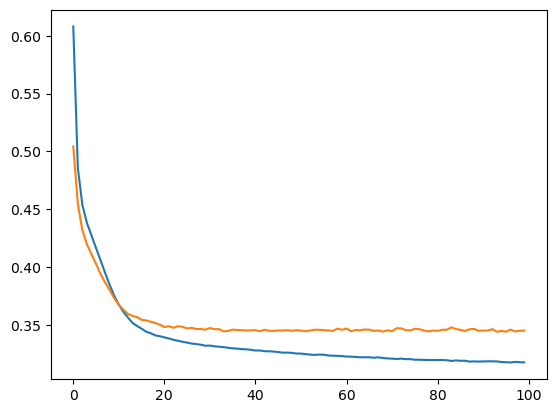

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

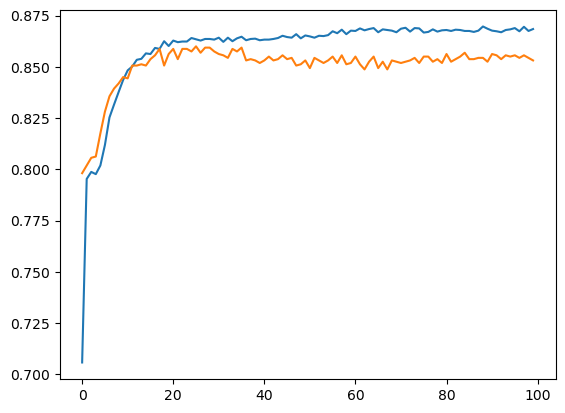

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])